# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

# Import Library

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Load Dataset

Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [11]:
df = pd.read_csv('./bank-full.csv', delimiter=';')

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'y':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

label_encoders['y'] = LabelEncoder()
df['y'] = label_encoders['y'].fit_transform(df['y'])

X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Normalize data

normalize numerical data.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create Data Loader
create data loader for pytorch

In [13]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model

define your model in here

In [14]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x


# Train your model

Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [15]:
model = BankMarketingNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in tqdm.tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Epoch 1/20: 100%|██████████| 848/848 [00:01<00:00, 616.47it/s]


Epoch 1/20, Train Loss: 0.2684, Validation Loss: 0.2392


Epoch 2/20: 100%|██████████| 848/848 [00:01<00:00, 635.11it/s]


Epoch 2/20, Train Loss: 0.2348, Validation Loss: 0.2358


Epoch 3/20: 100%|██████████| 848/848 [00:01<00:00, 637.35it/s]


Epoch 3/20, Train Loss: 0.2297, Validation Loss: 0.2339


Epoch 4/20: 100%|██████████| 848/848 [00:01<00:00, 642.98it/s]


Epoch 4/20, Train Loss: 0.2273, Validation Loss: 0.2323


Epoch 5/20: 100%|██████████| 848/848 [00:01<00:00, 498.09it/s]


Epoch 5/20, Train Loss: 0.2242, Validation Loss: 0.2331


Epoch 6/20: 100%|██████████| 848/848 [00:01<00:00, 458.78it/s]


Epoch 6/20, Train Loss: 0.2220, Validation Loss: 0.2308


Epoch 7/20: 100%|██████████| 848/848 [00:01<00:00, 629.96it/s]


Epoch 7/20, Train Loss: 0.2205, Validation Loss: 0.2290


Epoch 8/20: 100%|██████████| 848/848 [00:01<00:00, 606.16it/s]


Epoch 8/20, Train Loss: 0.2182, Validation Loss: 0.2290


Epoch 9/20: 100%|██████████| 848/848 [00:01<00:00, 642.88it/s]


Epoch 9/20, Train Loss: 0.2167, Validation Loss: 0.2275


Epoch 10/20: 100%|██████████| 848/848 [00:01<00:00, 633.43it/s]


Epoch 10/20, Train Loss: 0.2140, Validation Loss: 0.2279


Epoch 11/20: 100%|██████████| 848/848 [00:01<00:00, 642.90it/s]


Epoch 11/20, Train Loss: 0.2129, Validation Loss: 0.2286


Epoch 12/20: 100%|██████████| 848/848 [00:01<00:00, 631.76it/s]


Epoch 12/20, Train Loss: 0.2117, Validation Loss: 0.2261


Epoch 13/20: 100%|██████████| 848/848 [00:01<00:00, 543.02it/s]


Epoch 13/20, Train Loss: 0.2098, Validation Loss: 0.2294


Epoch 14/20: 100%|██████████| 848/848 [00:01<00:00, 445.01it/s]


Epoch 14/20, Train Loss: 0.2083, Validation Loss: 0.2318


Epoch 15/20: 100%|██████████| 848/848 [00:01<00:00, 504.17it/s]


Epoch 15/20, Train Loss: 0.2063, Validation Loss: 0.2287


Epoch 16/20: 100%|██████████| 848/848 [00:01<00:00, 457.08it/s]


Epoch 16/20, Train Loss: 0.2058, Validation Loss: 0.2283


Epoch 17/20: 100%|██████████| 848/848 [00:01<00:00, 634.49it/s]


Epoch 17/20, Train Loss: 0.2037, Validation Loss: 0.2267


Epoch 18/20: 100%|██████████| 848/848 [00:01<00:00, 622.25it/s]


Epoch 18/20, Train Loss: 0.2022, Validation Loss: 0.2302


Epoch 19/20: 100%|██████████| 848/848 [00:01<00:00, 638.97it/s]


Epoch 19/20, Train Loss: 0.2016, Validation Loss: 0.2289


Epoch 20/20: 100%|██████████| 848/848 [00:01<00:00, 633.43it/s]


Epoch 20/20, Train Loss: 0.2005, Validation Loss: 0.2292


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

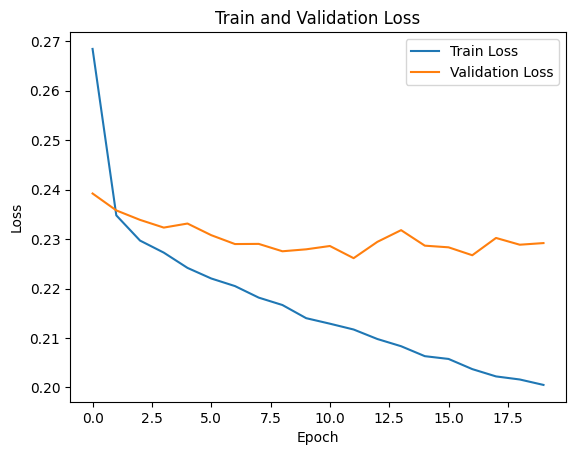

In [16]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()


## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [17]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')


Accuracy: 89.74897710936636%
